# A/B test

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

Берем данные отсюда: https://www.kaggle.com/zhangluyuan/ab-testing#ab_data.csv

Оцениваем, значимо ли выросла конверсия новой landing page, по сравнению со старой.

**Метрика** - конверсия трафика (перешел ли пользователь с landing page на целевой ресурс).

In [ ]:
!ls ab_data/

ab_data.csv


In [33]:
df = pd.read_csv('ab_data.csv')

In [34]:
df = df.dropna()

In [35]:
df.groupby('user_id').count().sort_values(by='landing_page',
                                         ascending=False).head()

,timestamp,group,landing_page,converted
user_id,,,,
729669,2,2,2,2
825266,2,2,2,2
663033,2,2,2,2
674959,2,2,2,2
875210,2,2,2,2


In [36]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [37]:
df[df['group']=='control']['landing_page'].value_counts()

old_page    145274
new_page      1928
Name: landing_page, dtype: int64

In [43]:
inter_users = set(
df[df['landing_page']=='old_page']['user_id']) & set(df[df['landing_page']=='new_page']['user_id'])

df_flt = df[~df['user_id'].isin(inter_users)]

In [44]:
df_flt.shape

(290482, 5)

In [45]:
df_cont = df_flt[df_flt['group'] == 'control']
df_exp = df_flt[df_flt['group'] == 'treatment']

<ipython-input-46-767d78c3d6e0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cont['converted'], kde=False)
<ipython-input-46-767d78c3d6e0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_exp['converted'], kde=False)


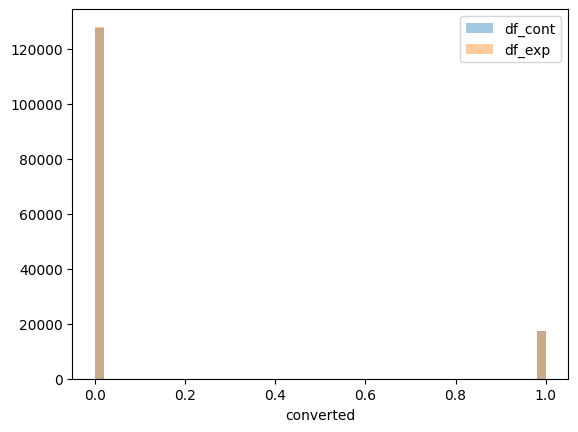

In [46]:
sns.distplot(df_cont['converted'], kde=False)
sns.distplot(df_exp['converted'], kde=False)
plt.legend(['df_cont','df_exp'])

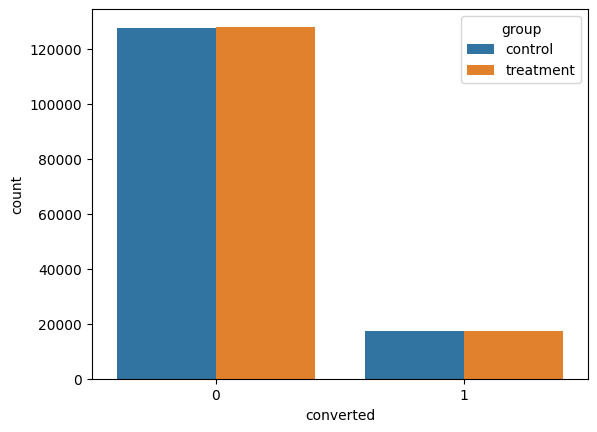

In [47]:
sns.countplot(data = df_flt, x =  'converted', hue = 'group');

In [27]:
def get_cl_samp(data, size=100, iters=1000):
    res = []
    for i in range(iters):
        samp = np.random.choice(data, size=size)
        res.append(np.mean(samp))
    return res

In [48]:
norm_cont = get_cl_samp(df_cont['converted'],
                        size=15000,
                        iters=500)
norm_exp = get_cl_samp(df_exp['converted'],
                       size=15000,
                       iters=500)

<ipython-input-49-7fae7f507f91>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(norm_cont, kde=True)
<ipython-input-49-7fae7f507f91>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(norm_exp, kde=True)


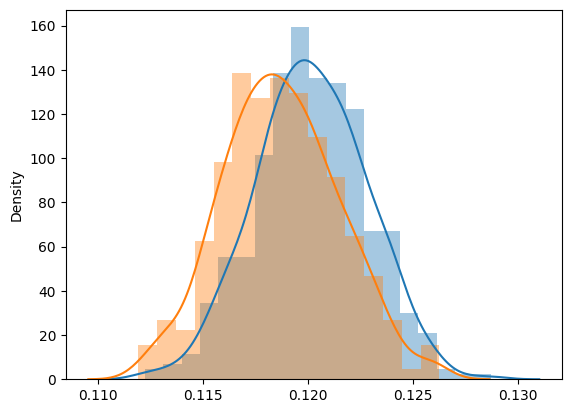

In [49]:
sns.distplot(norm_cont, kde=True)
sns.distplot(norm_exp, kde=True)
plt.show()

In [31]:
print(np.mean(norm_cont), np.mean(norm_exp))

0.12275933333333335 0.120412


In [50]:
# alpha = 0.001

stats.ttest_ind(norm_exp, norm_cont)

TtestResult(statistic=-8.505490406913532, pvalue=6.540825165644039e-17, df=998.0)

# Производные

Хорошая вводная

https://habr.com/ru/post/285408/


Поясняем на графиках:

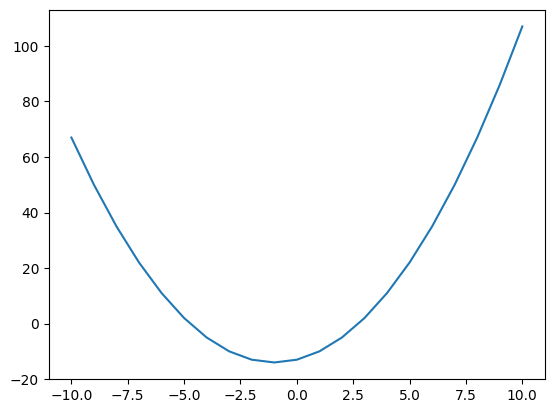

In [52]:
x = list(range(-10, 11))
plt.plot(
    x,
    list(map(lambda x: x**2 + 2*x - 13, x))
)
plt.show()

### Производная полинома

$a*x^{2} + b*x + c$

Равна

$2*a*x + b$

### График функции производной

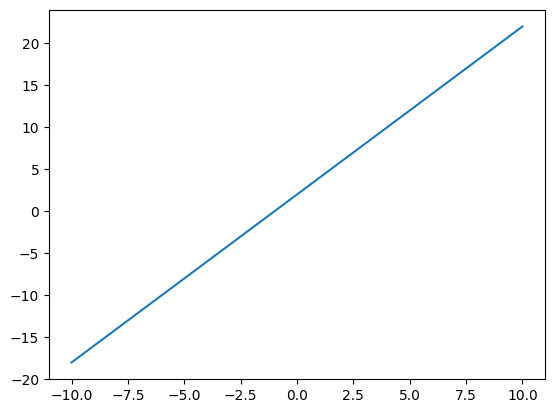

In [53]:
plt.plot(list(range(-10, 11)), list(map(lambda x: 2*x + 2, range(-10, 11))))
plt.show()

### Зачем это нужно?

2 основных назначения:

1. Легко можем найти локальный минимум, максимум. Требуется, если мы хотим найти оптимальное значение функции.
2. В каждый момент понимаем, какой у нас тренд: "идет" функция вниз или наоборот возрастает.

Пример:

$y = -3x^2 + 2x + 1$

Хотим понять, при каком $x$ значение $y$ максимально.

Находим производную функции.

$y' = -6x + 2$

Приравниваем $y'$ к 0. Получаем уравнение:

$-6x + 2 = 0$

Корень этого уравнения: $1/3$

**Итого**: при значении аргумента 1/3, функция принимает максимальное значение. Отразим на графике.

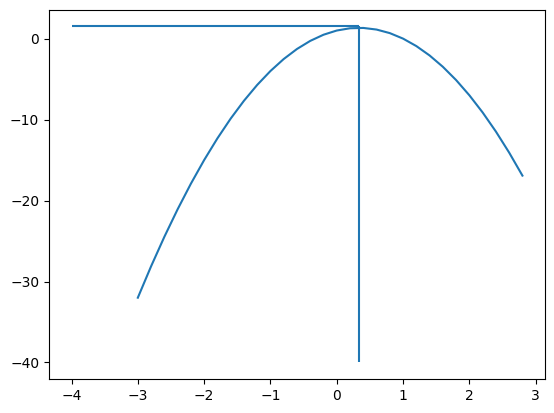

In [54]:
plt.plot(list(np.arange(-3, 3, 0.2)),
         list(map(lambda x: -3*x**2 + 2*x + 1,
                  np.arange(-3, 3, 0.2))))
plt.vlines(x=1/3,ymin=-40,ymax=1.5)
plt.hlines(y=1.5,xmin=-4,xmax=1/3)

plt.show()

### Проблема

Приравнивание производной к 0 может помочь найти локальный, но не глобальный минимум-максимум!

В задачах оптимизации часто требуется найти именно глобальный минимум максимум, или приблизиться к нему максимально.

# Функция правдоподобия

https://medium.com/@congyuzhou/биномиальное-распределение-1bf81bc17470  
https://medium.com/@congyuzhou/функция-правдоподобия-и-оценка-максимального-правдоподобия-922ab40ae03d

Функцией правдоподобия называется функция вида $W(\alpha) = \sum\log p(y_i/x_i,\alpha)$. Метод наибольшего правдоподобия состоит в том, что из множества моделей выбирается та, что максимизирует значение функции правдоподобия, т.е. выбирается значение параметра $\alpha^* = argmax_\alpha W(\alpha)$.

**Метод наибольшего правдоподобия** -- метод поиска модели, наилучшим в каком-то смысле образом описывающей обучающую выборку, полученную с некоторым неизвестным распределением.

### Пример

Количество погибших кавалеристов в отчете

кол-во погибших  кол-во донесений (отчетов)  
0                109  
1                65  
2                22  
3                3  
4                1  
5                0  

Моделируем кол-во погибших с помощью **распределения Пуассона**

О распределении отдельно

Вероятность того, что случайная величина из распределения Пуассона примет значение равное k равняется:

$p(k)\equiv \mathbb {P} (Y=k)={\frac {\lambda ^{k}}{k!}}\,e^{-\lambda }$

Но каким образом выбрать неизвестный параметр $\lambda$ ?

Вероятность получения именно такой выборки, как выше, равняется произведению функций вероятностей для каждого из значений случайной величины - это и есть функция **правдопободия выборки**

In [ ]:
X = [0, 1, 2, 3, 4, 5]
Y = [109, 65, 22, 3, 1]

Для этого необходимо найти производную функции правдоподобия

Она равна:

In [ ]:
Yi = [0 for i in range(109)] + [1 for i in range(65)] + \
[2 for i in range(22)] + [3 for i in range(3)] + [4]

In [ ]:
sum(Yi) / sum(Y)

0.61

In [ ]:
import math

In [ ]:
0.61**2 / math.factorial(2) * np.e**(-0.61)

0.10109042919131069

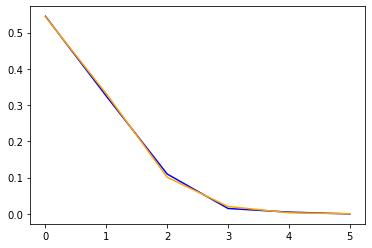

In [ ]:
K = [0, 1, 2, 3, 4, 5]
X = [109 / 200, 65 / 200, 22 / 200, 3 / 200, 1 / 200, 0]
Y_ = []

for k in K:
    Y_.append(0.61**k / math.factorial(k) * np.e**(-0.61))

plt.plot(K, X, c='blue')
plt.plot(K, Y_, c='orange')
plt.show()